# Introduction to Data Visualization with Seaborn

In [160]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# change the default console output settings in NumPy and pandas to improve readability
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

# Import datasets
countries = pd.read_csv("datasets/countries_of_the_world.csv", decimal=",")
mpg = pd.read_csv("datasets/mileage_per_gallon.csv")
student_data = pd.read_csv("datasets/student_alcohol_consumption.csv", index_col=0)
survey_data = pd.read_csv("datasets/young_people_survey_responses.csv", index_col=0)

''' Create lists from the following columns in the countries DataFrame:
"GDP", "Phones", "Literacy", and "Region"
'''

gdp = list(countries["GDP ($ per capita)"])
phones = list(countries["Phones (per 1000)"])
percent_literate = list(countries["Literacy (%)"])
region = list(countries["Region"])


**Seaborn API Reference:**

https://seaborn.pydata.org

## 1. Introduction to Seaborn

### Introduction

#### _Making a scatter plot with lists_

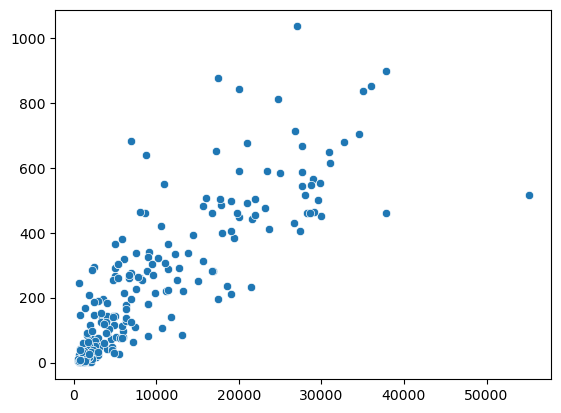

In [161]:
# Create a scatter plot of GDP vs. number of phones per 1000 people
sns.scatterplot(
    x = gdp,
    y= phones
)
plt.show()

#### _Making a count plot with a list_

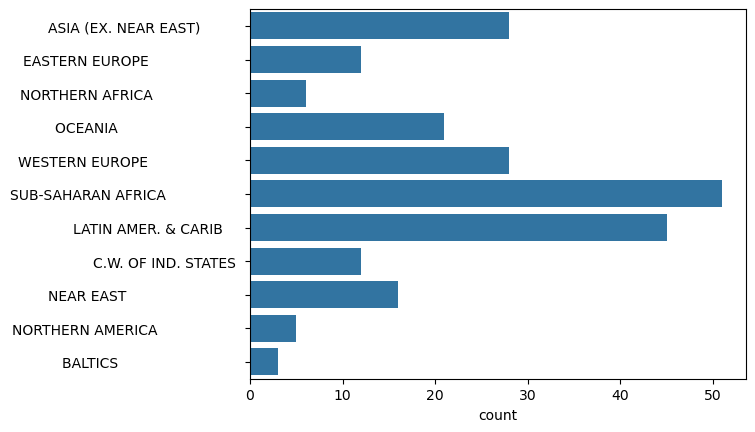

In [162]:
# Create a count plot with region on the y-axis
sns.countplot(y = region)
plt.show()

### Using pandas with Seaborn

#### _Making a count plot with a DataFrame_

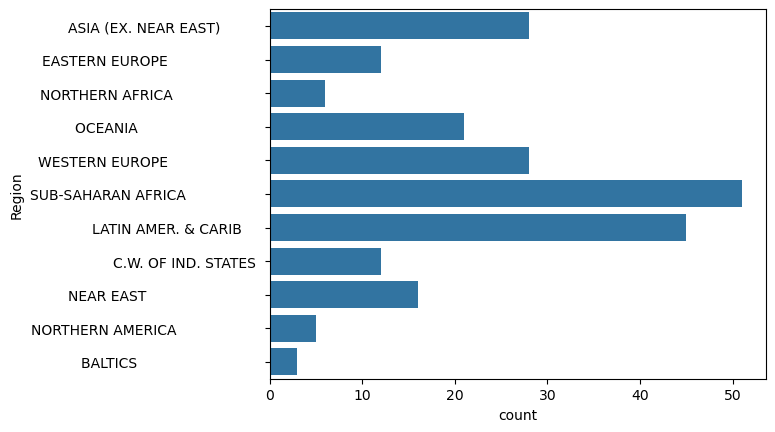

In [163]:
# Create a count plot of 'Region' from the 'countries' DataFrame
sns.countplot(
    y = "Region",
    data = countries
)
plt.show()

### Adding a third variable with hue

#### _Hue and scatter plots_

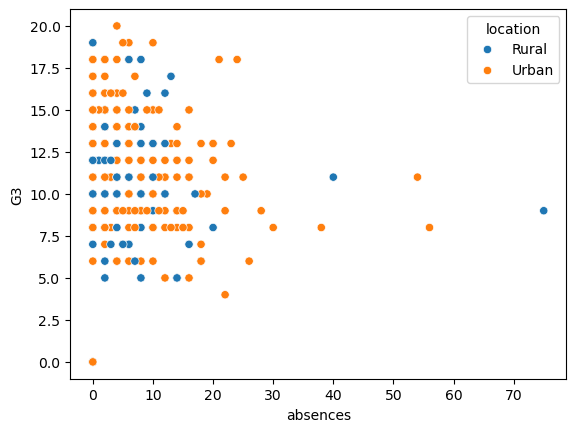

In [164]:
''' Create a scatter plot with 'absences' and final grade ('G3') using the  
DataFrame 'student_data'. Color the points based on 'location' (urban vs. rural).
Make 'Rural' appear before 'Urban' in the plot legend.
'''

sns.scatterplot(
    x = "absences",
    y = "G3",
    data = student_data,
    hue = "location",
    hue_order = ["Rural", "Urban"]
)

plt.show()

#### _Hue and count plots_

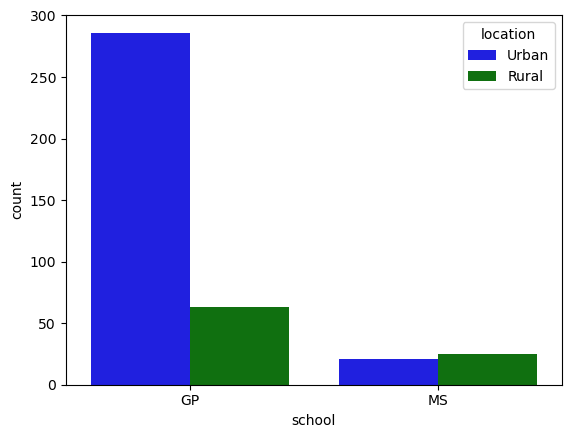

In [165]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {
    "Rural": "green",
    "Urban": "blue"
}

# Create a count plot of school with location subgroups
sns.countplot(
    x = "school",
    hue = "location",
    data = student_data,
    palette = palette_colors
)
plt.show()

## 2. Visualizing Two Quantitative Variables

### Introduction

#### _Creating subplots with col and row_

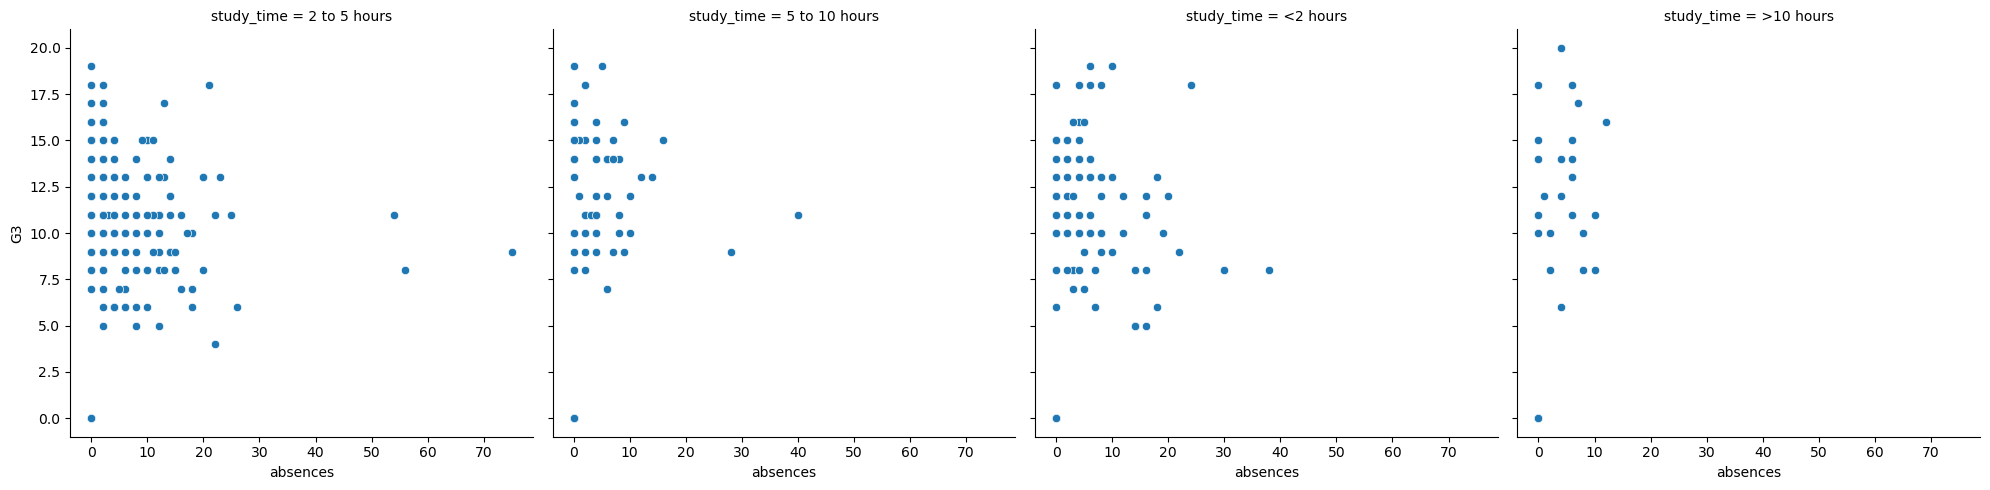

In [166]:
''' Plot the relationship between the number of absences that a student has in  
school and their final grade, creating separate subplots based on each student's  
weekly study time ("study_time")
'''

sns.relplot(
    x = "absences",
    y = "G3",
    data = student_data,
    kind = "scatter",
    col = "study_time"
)
plt.show()

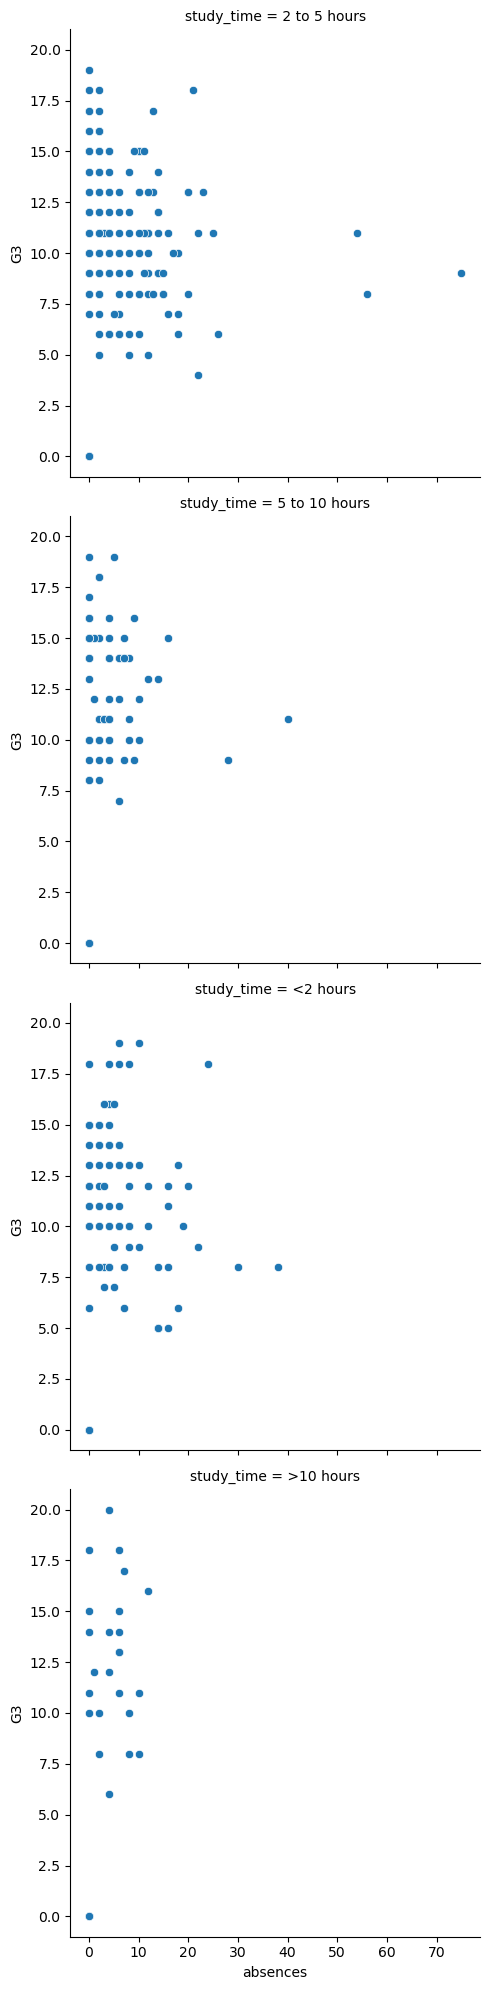

In [167]:
# Arrange the subplots in rows
sns.relplot(
    x = "absences",
    y = "G3",
    data = student_data,
    kind = "scatter",
    row = "study_time"
)
plt.show()

#### _Creating two-factor subplots_

Does a student's first semester grade ("G1") tend to correlate with their final  
grade (G3)? 

Does extra educational support from their school ("schoolsup") or from their   
family ("famsup"), result in higher grades.

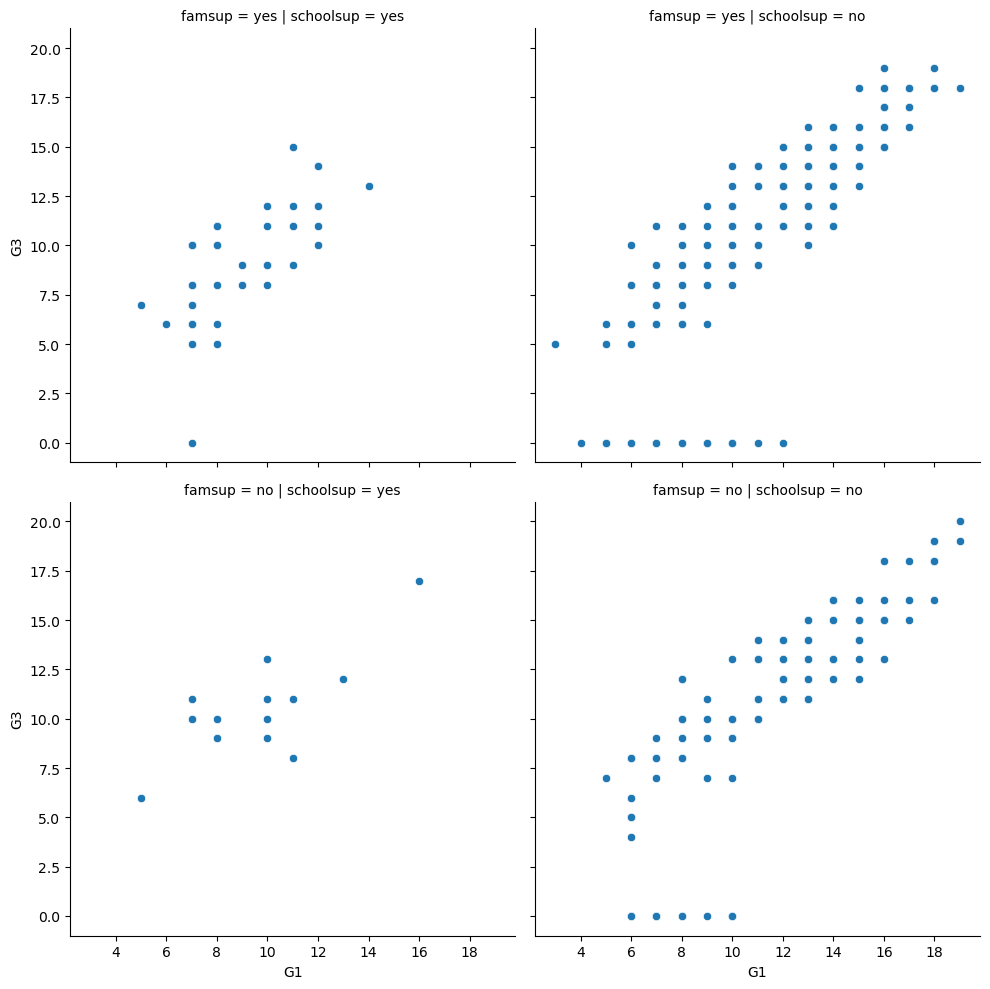

In [168]:
'''Create a scatter plot of G1 vs G3. Add column subplots based on "schoolsup".
Add row subplots based on "famsup". Order 'yes' before 'no'.
'''
sns.relplot(
    x = "G1", y = "G3",
    data = student_data,
    kind = "scatter",
    col = "schoolsup",
    row = "famsup",
    col_order = ["yes", "no"],
    row_order = ["yes", "no"]
)
plt.show()

### Customizing scatter plots

In [169]:
# Preview dataset
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### _Changing the size of scatter plots_

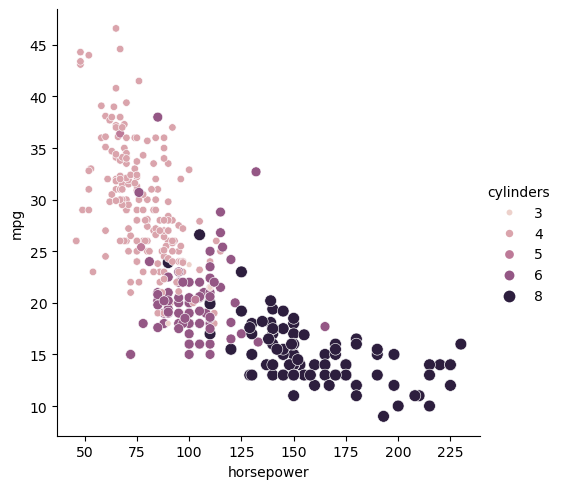

In [170]:
''' Plot the relationship between the power of a car's engine ('horsepower')
and its fuel efficiency ('mpg'). How does this relationship vary by the  
number of cylinders ('cylinders') a car has? Vary the color of the points by  
the number of cylinders.
'''

sns.relplot(
    x = "horsepower",
    y = "mpg",
    data = mpg,
    kind = "scatter",
    size = "cylinders",
    hue = "cylinders"
)
plt.show()

#### _Changing the style of scatter plot points_

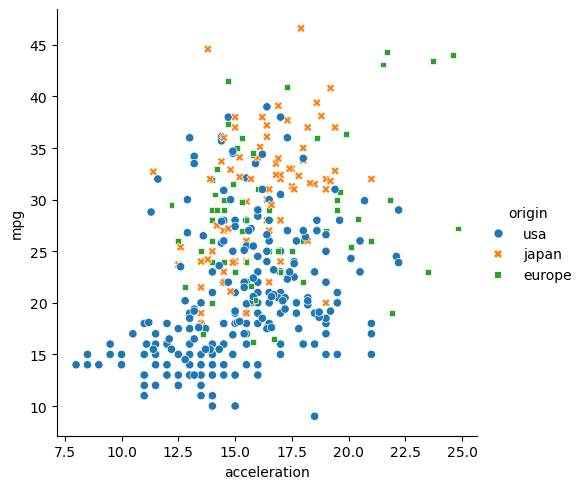

In [171]:
''' Plot the relationship between a car's 'acceleration' and its fuel efficiency ('mpg').
Vary the style and color of the plot points by country of origin ('origin').
'''

sns.relplot(
    x = "acceleration",
    y = "mpg",
    data = mpg,
    kind = "scatter",
    style = "origin",
    hue = "origin"
)
plt.show()

### Introduction to line plots

* For multiple observations per x-value

    * Observations are aggregated to the mean by default
    
    * A 95% confidence interval for the mean is displayed  
    by a shaded region

#### _Intrepreting line plots_

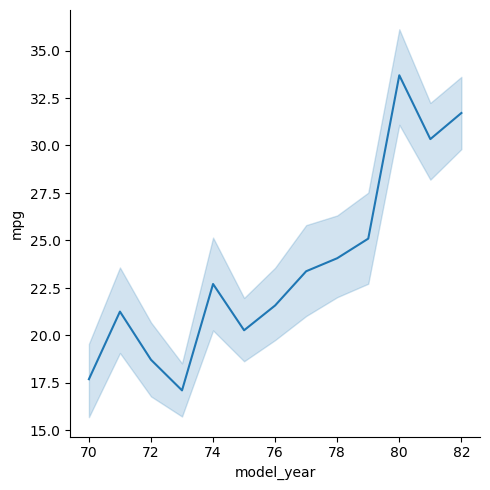

In [172]:
''' How has the average miles per gallon ('mpg') achieved by cars changed over  
time.
'''
# Create a line plot
sns.relplot(
    x = "model_year",
    y = "mpg",
    data = mpg,
    kind = "line"
)
plt.show()

#### _Visualizing standard deviation with line plots_

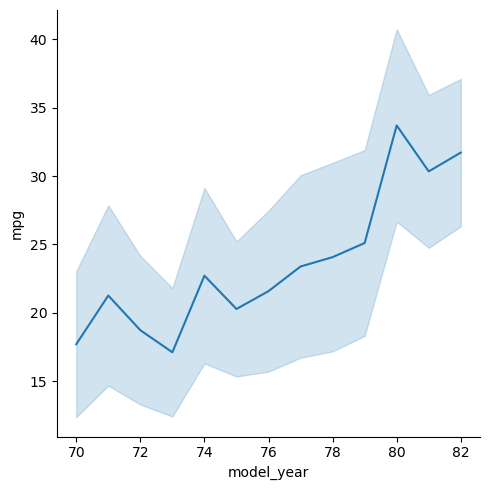

In [173]:
''' Change the plot so that the shaded area shows the standard deviation instead   
of the confidence interval for the mean. The SD shows the distribution of 
miles per gallon for all the cars in each year.
'''

sns.relplot(
    x = "model_year",
    y = "mpg",
    data = mpg,
    kind = "line",
    errorbar = "sd"
)
plt.show()

#### _Plotting subgroups in line plots_

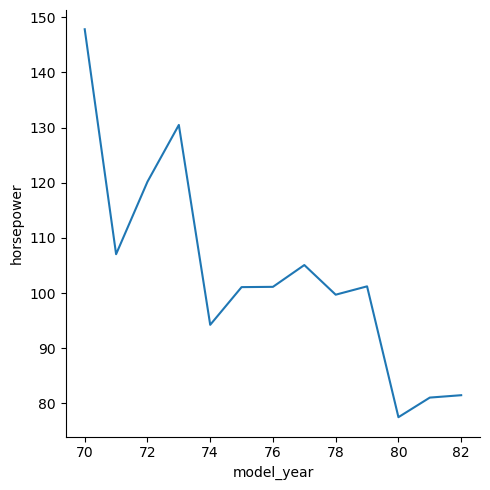

In [174]:
''' How has the average horsepower for cars changed over time and does this trend  
differ by country of origin?. Turn off the confidence interval of the plot.
'''

sns.relplot(
    x = "model_year",
    y = "horsepower",
    data = mpg,
    kind = "line",
    errorbar = None
)
plt.show()

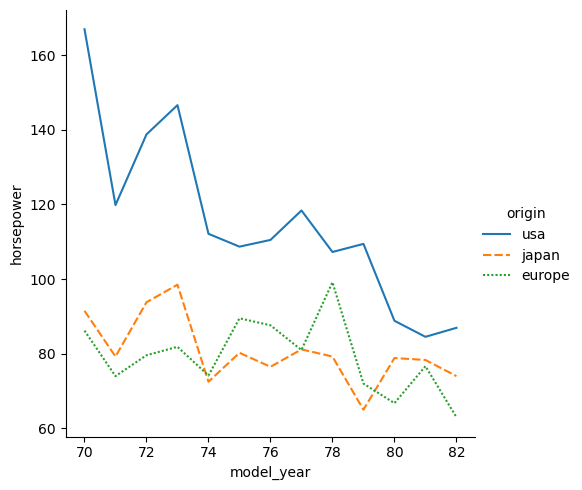

In [175]:
''' Create different lines for each country of origin that vary both in line  
style and color.
'''

sns.relplot(
    x = "model_year",
    y = "horsepower",
    data = mpg,
    kind = "line",
    errorbar = None,
    style = "origin",
    hue = "origin"
)
plt.show()

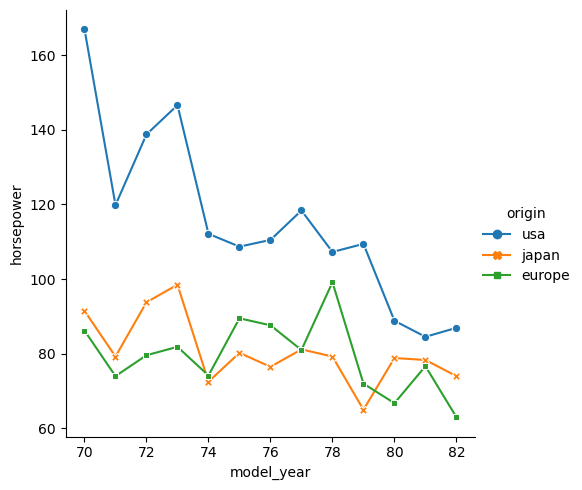

In [176]:
''' Add markers for each data point to the lines. Set the dashes parameter to use  
solid lines for all countries.
'''

sns.relplot(
    x = "model_year",
    y = "horsepower",
    data = mpg,
    kind = "line",
    errorbar = None,
    style = "origin",
    hue = "origin",
    markers = True,
    dashes = False
)
plt.show()

## 3. Visualizing a Categorical and a Quantitative Variable

### Count plots and bar plots

In [177]:
# Preview dataset
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 1009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Music            1007 non-null   float64
 1   Techno           1003 non-null   float64
 2   Movies           1004 non-null   float64
 3   History          1008 non-null   float64
 4   Mathematics      1007 non-null   float64
 5   Pets             1006 non-null   float64
 6   Spiders          1005 non-null   float64
 7   Loneliness       1009 non-null   float64
 8   Parents' advice  1008 non-null   float64
 9   Internet usage   1010 non-null   object 
 10  Finances         1007 non-null   float64
 11  Age              1003 non-null   float64
 12  Siblings         1004 non-null   float64
 13  Gender           1004 non-null   object 
 14  Village - town   1006 non-null   object 
dtypes: float64(12), object(3)
memory usage: 126.2+ KB


#### _Count plots_

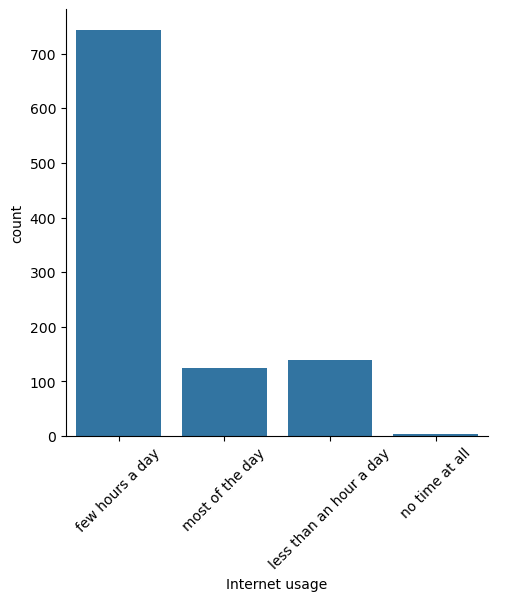

In [178]:
# Create a count plot of internet usage
sns.catplot(
    x = "Internet usage",
    data = survey_data,
    kind = "count"
)
plt.xticks(rotation=45)
plt.show()

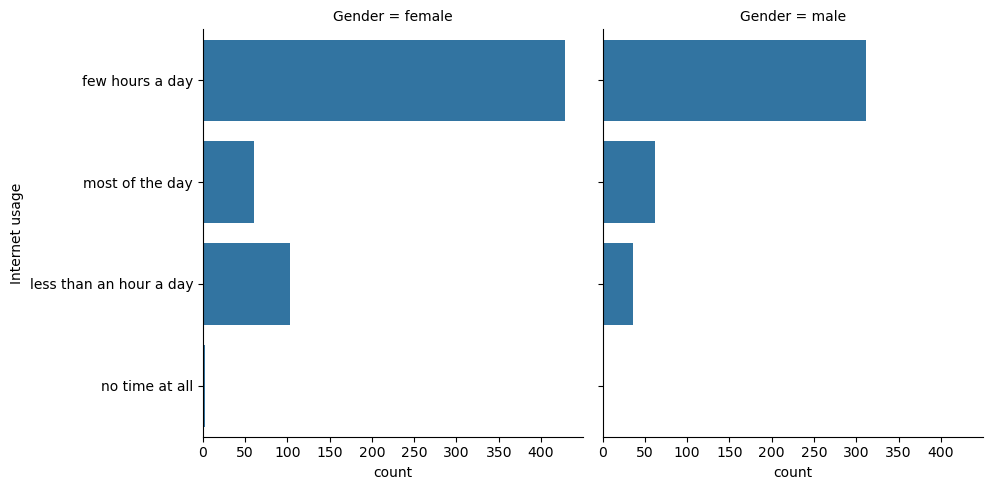

In [179]:
''' Make the bars horizontal instead of vertical. Separate this plot into 
two side-by-side column subplots based on "Gender".
'''

sns.catplot(
    y = "Internet usage",
    data = survey_data,
    kind = "count",
    col = "Gender"
)
plt.show()

#### _Customizing bar plots_

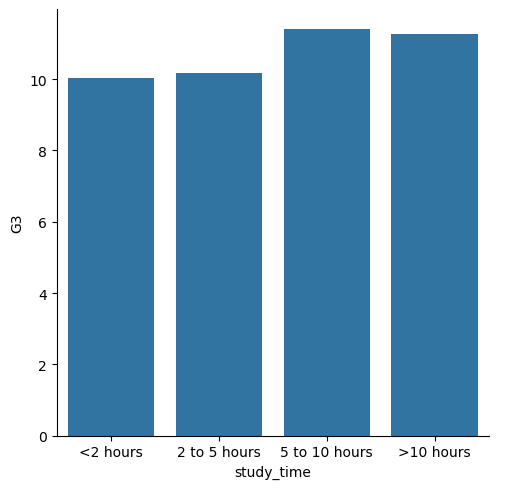

In [180]:
''' Do students who report higher amounts of studying tend to get better final grades?
Use the category_order list to rearrange the bars from lowest study time to highest.
Do not display confidence intervals.
'''

category_order = [
    "<2 hours",
    "2 to 5 hours",
    "5 to 10 hours",
    ">10 hours"
]

sns.catplot(
    x = "study_time",
    y = "G3",
    data = student_data,
    kind = "bar",
    order = category_order,
    errorbar = None
)
plt.show()

### Box plots

#### Changing the whiskers using 'whis'

* By default, the whiskers extend to 1.5 times the interquartile range

* To change the way the whiskers are defined:

    * Make them extend to 2.0 * IQR: `whis=2.0`

    * To draw the whiskers at specific lower and upper percentiles: `whis=[5, 95]`
    
    * To draw the the whiskers at the min and max values: `whis=[0, 100]`

#### _Create and interpret a box plot_

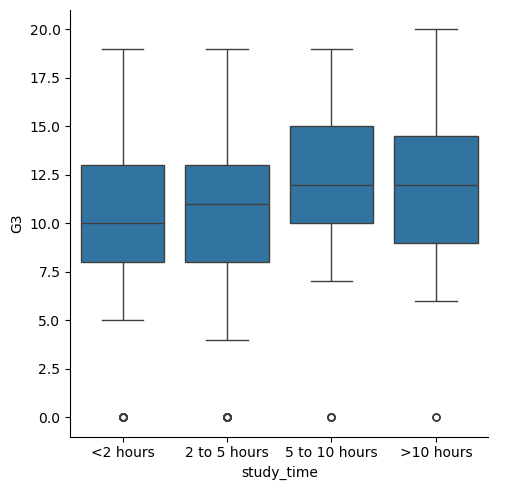

In [181]:
# Create a boxplot using 'student_data'. Order the categories by 'study_time_order'.

study_time_order = [
    "<2 hours",
    "2 to 5 hours",
    "5 to 10 hours",
    ">10 hours"
]

sns.catplot(
    x = "study_time",
    y = "G3",
    data = student_data,
    kind = "box",
    order = study_time_order
)
plt.show()

#### _Omitting outliers_

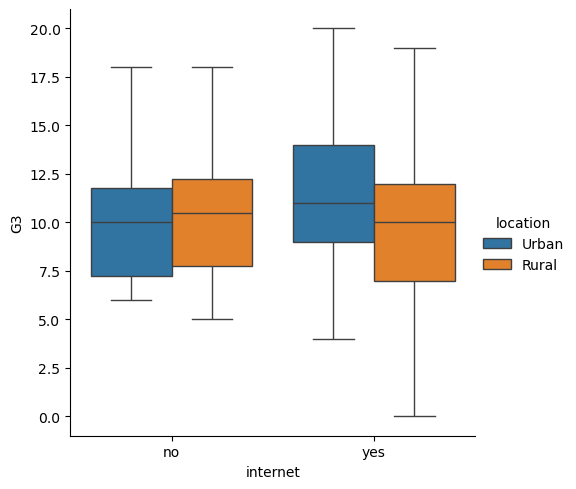

In [182]:
''' Compare the distribution of final grades ('G3') between students who have internet  
access at home and those who don't. Add subgroups so each box plot is colored based on  
'location'. Do not display the outliers.
'''

sns.catplot(
    x = "internet",
    y = "G3",
    data = student_data,
    kind = "box",
    hue = "location",
    showfliers = False  # to exclude outliers
)
plt.show()

#### _Adjusting the whiskers_

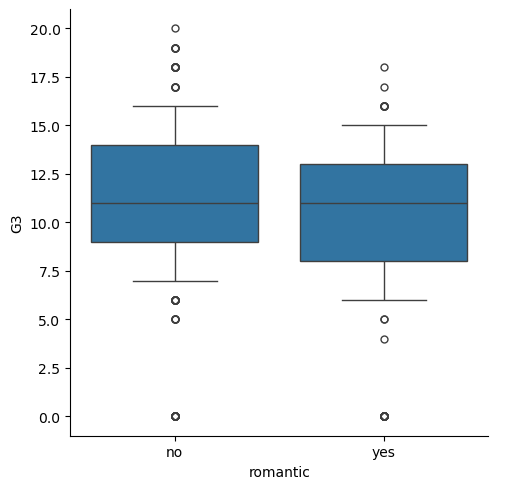

In [183]:
''' Compare the distribution of final grades ('G3') between students who are in a  
romantic relationship and those that are not. Try different ways to define the whiskers.
'''

# Extend the box plot whiskers to 0.5 * IQR
sns.catplot(
    x = "romantic", y = "G3",
    data = student_data,
    kind = "box", whis = 0.5
)
plt.show()

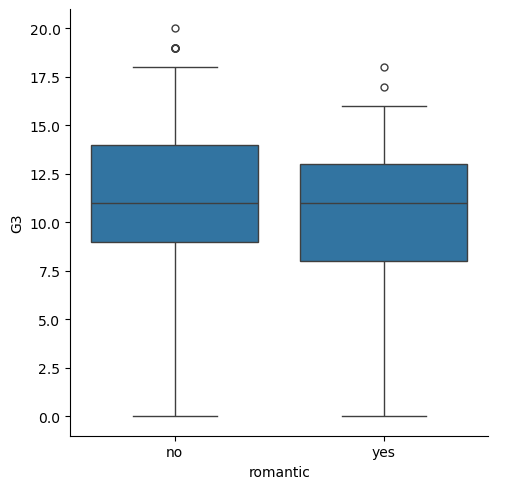

In [184]:
# Set the whiskers to extend to the 5th and 95th percentile
sns.catplot(
    x = "romantic", y = "G3",
    data = student_data,
    kind = "box", whis = [5, 95]
)
plt.show()

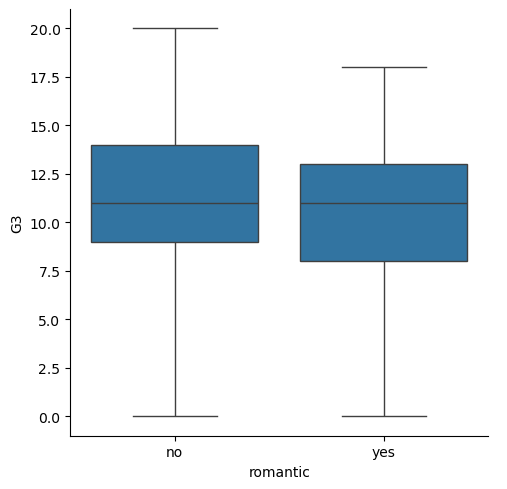

In [185]:
# Set the whiskers to extend to the min and max values
sns.catplot(
    x = "romantic", y = "G3",
    data = student_data,
    kind = "box", whis = [0, 100]
)
plt.show()

### Point plots

Point plots show the mean of a quantitative variable for the observations in each category,  
plotted as a single point.

#### _Customizing point plots_

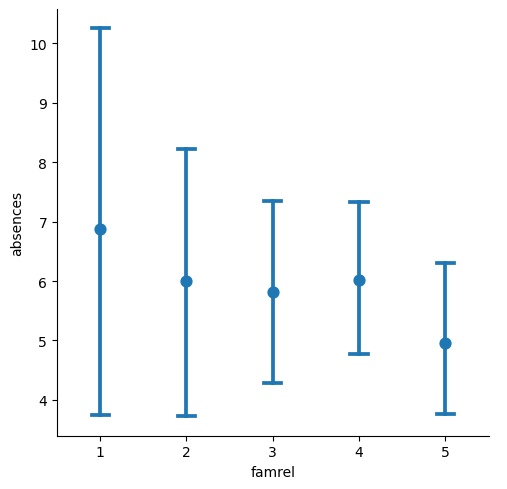

In [186]:
''' Does the quality of the student's family relationship influence the number of  
absences the student has in school? The "famrel" variable, describes the quality of a  
student's family relationship from 1 (very bad) to 5 (very good).
'''

# Create a point plot of 'famrel' vs 'absences'
sns.catplot(
    x = "famrel",
    y = "absences",
    data = student_data,
    kind = "point",
    # add caps to the end of the confidence intervals
    capsize = 0.2,
    # remove the lines joining the points in each category
    linestyle = "none"
)
plt.show()

#### _Point plots with subgroups_

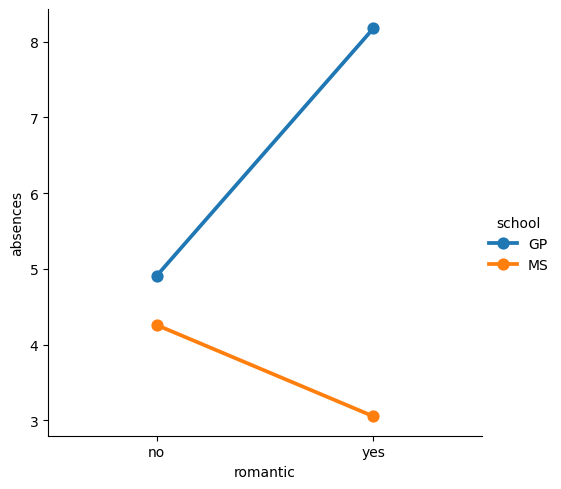

In [187]:
''' Is being in a romantic relationship associated with higher or lower school  
attendance? Does this association differ by the school attended?
'''

# Create a point plot that uses color to create subgroups
sns.catplot(
    x = "romantic",
    y = "absences",
    data = student_data,
    kind = "point",
    hue = "school",
    # Turn off the confidence interval
    errorbar = None
)
plt.show()

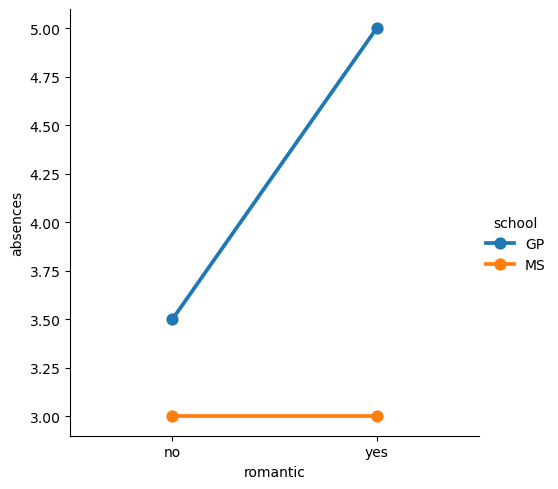

In [188]:
''' There may be outliers of students with many absences. Use the median function from  
numpy to display the median number of absences instead of the average.
'''

# Create a point plot that uses color to create subgroups
sns.catplot(
    x = "romantic",
    y = "absences",
    data = student_data,
    kind = "point",
    hue = "school",
    # Turn off the confidence interval
    errorbar = None,
    estimator = np.median
)
plt.show()

## 4. Customizing Seaborn Plots

### Changing plot style and color

#### Changing the figure style

* Figure "style" includes background and axes

* Preset options: "white", "dark", "whitegrid", "darkgrid", "ticks"

* `sns.set_style()`

#### Changing the palette

* Figure "palette" changes the color of the main elements of the plot

* Use preset palettes or create a custom palette

* `sns.set_palette()`

#### Changing the scale

* Figure "context" changes the scale of the plot elements and labels

* Scale options from smallest to largest: "paper", "notebook", "talk", "poster"

* `sns.set_context()`

#### Reset to default Seaborn settings

* `sns.reset_defaults()`

#### _Changing style and palette_

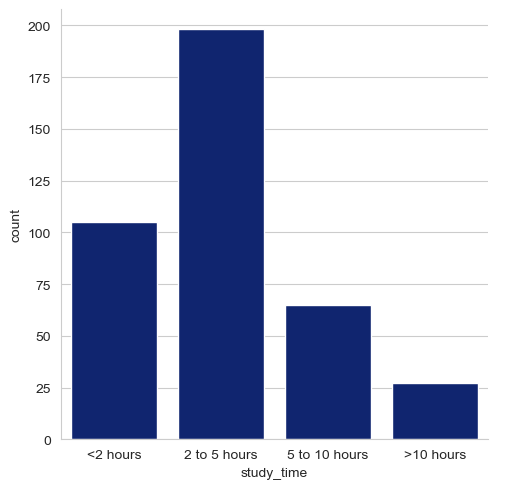

In [189]:
''' Create a count plot of students` "study_time"s. Change the style and palette to make 
the plot easier to interpret.
'''

# Set the style to whitegrid
sns.set_style("whitegrid")

# Set the color palette
sns.set_palette("dark")

# Create a count plot of the survey responses
category_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]

sns.catplot(
    x = "study_time",
    data = student_data,
    kind = "count",
    order = category_order
)
plt.show()

#### _Changing the scale_

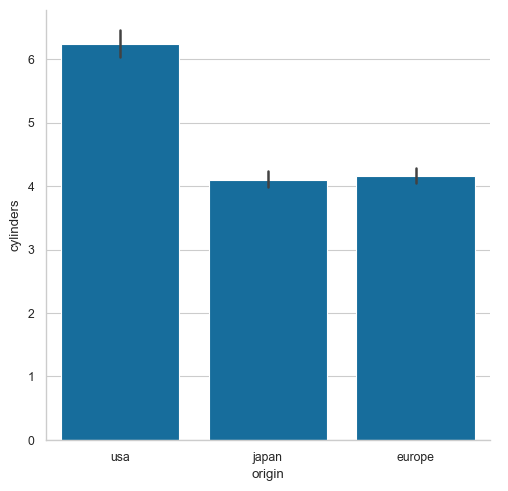

In [190]:
''' How does the average number of car cylinders vary by country/region of origin?
'''
sns.set_palette("colorblind")

# Set the smallest scale
sns.set_context("paper")


sns.catplot(
    x = "origin",
    y = "cylinders",
    data = mpg,
    kind = "bar"
)
plt.show()

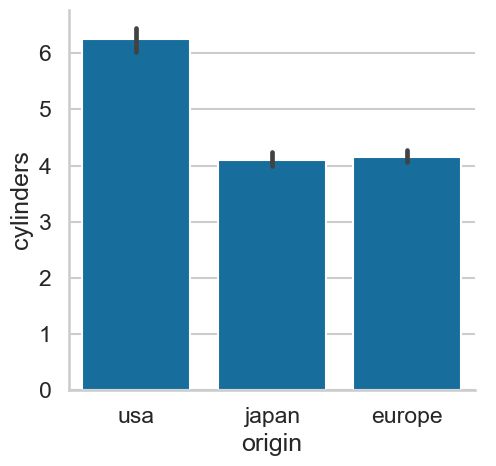

In [191]:
# Change the context to "talk" to increase the scale
sns.set_context("talk")

sns.catplot(
    x = "origin",
    y = "cylinders",
    data = mpg,
    kind = "bar"
)
plt.show()

#### _Using a custom palette_

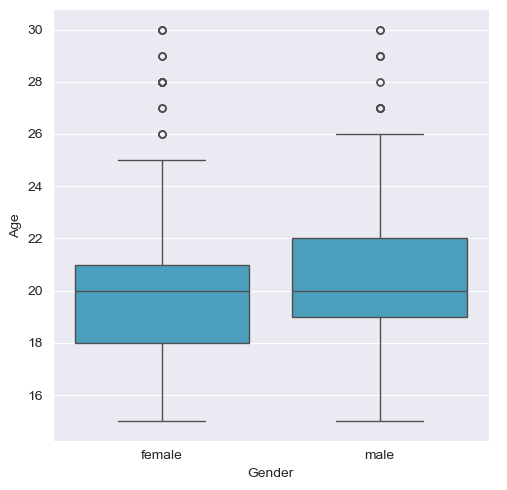

In [192]:
''' Create a box plot showing the distribution of ages for male versus female  
survey respondents. Set the style and a custom color palette.  
'''

# Reset to default Seaborn settings
sns.reset_defaults()

# Set the style
sns.set_style("darkgrid")

# Set a custom color palette"
sns.set_palette(["#39A7D0", "#36ADA4"])

sns.catplot(
    x = "Gender",
    y = "Age",
    data = survey_data,
    kind = "box"
)
plt.show()

### Adding titles and labels: Part 1

#### FacetGrid vs. AxesSubplot objects

Seaborn plots create two different types of objects:
* FacetGrid
    * Consists of one or more AxesSubplots
    
* AxesSubplot

#### FacetGrid vs. AxesSubplot objects

| **Object Type** | **Plot Types**                   | **Characteristics**        |
|-----------------|----------------------------------|----------------------------|
| `FacetGrid`     | relplot(), catplot()             | Can create subplots        |
| `AxesSubplot`   | scatterplot(), countplot(), etc. | Only creates a single plot |

#### _FacetGrids vs. AxesSubplots_

The method of adding a title to a plot will differ depending on the type of object it is.

<class 'seaborn.axisgrid.FacetGrid'>


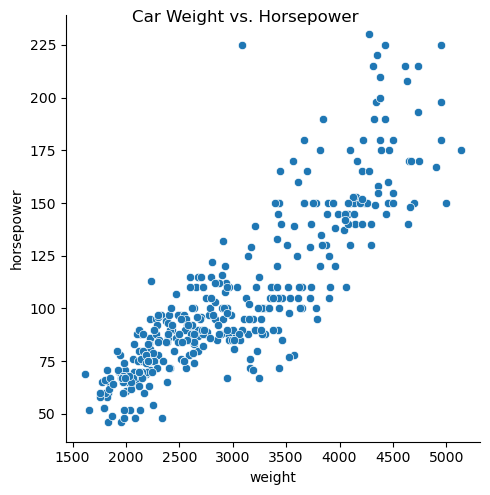

In [193]:
# Reset to default Seaborn settings
sns.reset_defaults()

# Create scatter plot
g = sns.relplot(
    x = "weight",
    y = "horsepower",
    data = mpg,
    kind = "scatter"
)

# Identify plot type
type_of_g = type(g)

print(type_of_g)

# Title the plot which is a FacetGrid object
g.fig.suptitle("Car Weight vs. Horsepower")

plt.show()

### Adding titles and labels: Part 2

#### _Adding a title and axis labels_

<class 'matplotlib.axes._axes.Axes'>


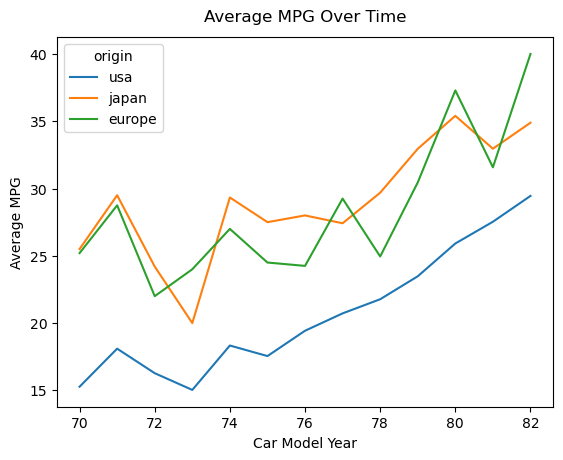

In [209]:
# Create line plot 
g = sns.lineplot(
    x = "model_year",
    y = "mpg",
    data = mpg,
    hue = "origin",
    errorbar = None
)

# Identify plot type
type_of_g = type(g)

print(type_of_g)

# Title the plot which is an AxesSubplot object
g.set_title("Average MPG Over Time", y=1.02)  # y parameter is used to adjust the height

# Label the axes
g.set(xlabel="Car Model Year", ylabel="Average MPG")

plt.show()

#### _Rotating x-tick labels_

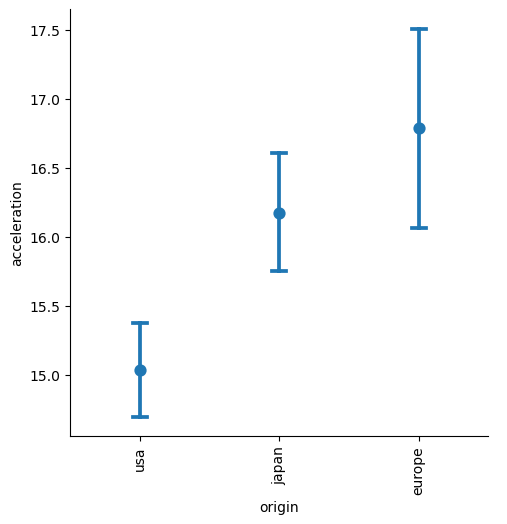

In [205]:
# Create point plot
sns.catplot(
    x = "origin",
    y = "acceleration",
    data = mpg,
    kind = "point",
    linestyle = "none",
    capsize = 0.1
)

# Rotate x-tick labels
plt.xticks(rotation=90)

plt.show()